In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hc=pd.read_csv("/content/drive/MyDrive/INTERNSHIP/Madhu/Hierarchical_Clustering/Mall_Customer(Hier_Cluster).csv")
hc.head()

,ID,Gender_Code,Region,Income,Spending
0,1,Male,Urban,15.0,39.0
1,2,Male,Urban,15.0,81.0
2,3,Female,Rural,16.0,6.0
3,4,Female,Rural,16.0,77.0
4,5,Female,Urban,17.0,40.0


In [ ]:
hc.isnull().sum()

,0
ID,0
Gender_Code,0
Region,0
Income,0
Spending,0


In [ ]:
hc_clean = hc.drop(columns=["ID"])
hc_clean.head()

,Gender_Code,Region,Income,Spending
0,Male,Urban,15.0,39.0
1,Male,Urban,15.0,81.0
2,Female,Rural,16.0,6.0
3,Female,Rural,16.0,77.0
4,Female,Urban,17.0,40.0


In [ ]:
le = LabelEncoder()

hc_clean["Gender_Code"] = le.fit_transform(hc_clean["Gender_Code"])
hc_clean["Region"] = le.fit_transform(hc_clean["Region"])
hc_clean.head()

,Gender_Code,Region,Income,Spending
0,1,1,15.0,39.0
1,1,1,15.0,81.0
2,0,0,16.0,6.0
3,0,0,16.0,77.0
4,0,1,17.0,40.0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hc_clean)

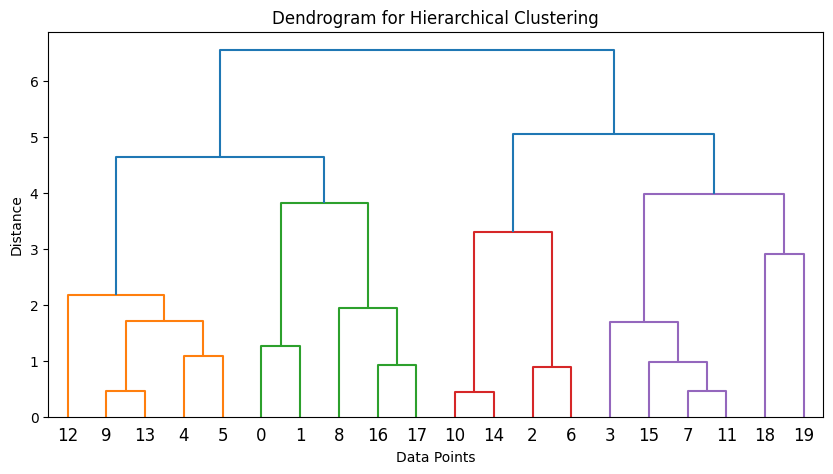

In [ ]:
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
hc = AgglomerativeClustering(
    n_clusters=3,
    metric="euclidean",
    linkage="ward"
)

clusters = hc.fit_predict(X_scaled)

In [ ]:
# -------- USER INPUT --------
gender = input("Enter Gender (Male/Female): ")
region = input("Enter Region (Urban/Rural): ")
income = float(input("Enter Income: "))
spending = float(input("Enter Spending: "))

# Encode user input (same encoders used before)
gender_encoded = le.fit_transform([gender])[0]
region_encoded = le.fit_transform([region])[0]

# Create input array
user_data = np.array([[gender_encoded, region_encoded, income, spending]])

# Scale user input (same scaler)
user_data_scaled = scaler.transform(user_data)

# Assign cluster
from sklearn.metrics import pairwise_distances_argmin

# Calculate cluster centroids from the training data
# 'clusters' contains the assigned cluster label for each point in X_scaled
cluster_centroids = np.array([X_scaled[clusters == i].mean(axis=0) for i in range(hc.n_clusters)])

# Find the closest cluster centroid to the user's scaled data
cluster_label = pairwise_distances_argmin(
    user_data_scaled,
    cluster_centroids
)

print("User belongs to Cluster:", cluster_label[0])

Enter Gender (Male/Female): Female
Enter Region (Urban/Rural): Urban
Enter Income: 45.6
Enter Spending: 12.7
User belongs to Cluster: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
hc_clean["Cluster"] = clusters
hc_clean.head()

,Gender_Code,Region,Income,Spending,Cluster
0,1,1,15.0,39.0,0
1,1,1,15.0,81.0,0
2,0,0,16.0,6.0,2
3,0,0,16.0,77.0,1
4,0,1,17.0,40.0,0


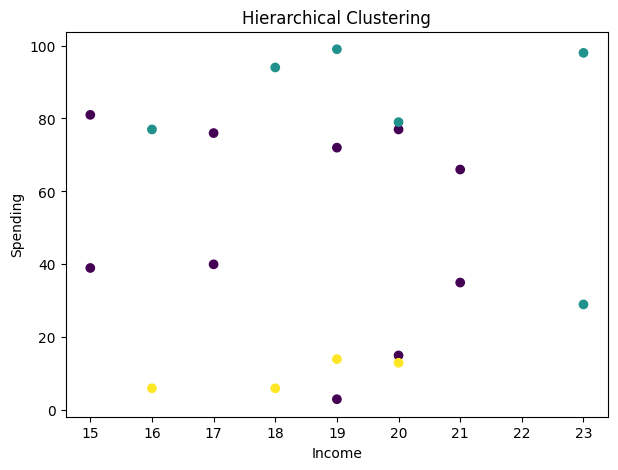

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(
    hc_clean["Income"],
    hc_clean["Spending"],
    c=hc_clean["Cluster"]
)
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Hierarchical Clustering")
plt.show()